<a href="https://colab.research.google.com/github/iam-fern/Research/blob/main/plot_the_DataFrame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm

from statsmodels.formula.api import ols

In [16]:
df = pd.read_csv('https://github.com/iam-fern/Research/raw/main/generate_datanew.csv', index_col=['Replicate', 'no'])
df

Xt1       Xt2       Xt3             e         Y
Replicate no                                                      
1         1   0.755341  0.301218 -0.937971 -9.568571e-03  1.367698
          2   0.143752 -0.861772 -1.542539 -4.276801e-01 -3.215977
          3  -0.569876 -0.812114 -1.124769  8.615647e-01 -0.633723
          4   0.006066 -0.297299 -0.148308  8.256490e-04  3.023397
          5  -0.473473 -0.026203  0.466757  8.600000e-07  5.451632
...                ...       ...       ...           ...       ...
100       26  0.840966 -0.003035 -1.242215  1.480000e-10 -0.140140
          27  1.241764 -0.576958  1.445442 -3.989538e-02  8.794963
          28 -1.058109 -0.571064  0.211047  7.656499e-02  3.556496
          29 -0.013071 -0.561579  0.171033 -2.622112e-02  3.741900
          30 -1.058767 -0.178490  0.907317  4.637470e-04  6.575562

[3000 rows x 5 columns]

In [17]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

Xt1       Xt2       Xt3             e         Y
Replicate no                                                      
1         1   0.755341  0.301218 -0.937971 -9.568571e-03  1.367698
          2   0.143752 -0.861772 -1.542539 -4.276801e-01 -3.215977
          3  -0.569876 -0.812114 -1.124769  8.615647e-01 -0.633723
          4   0.006066 -0.297299 -0.148308  8.256490e-04  3.023397
          5  -0.473473 -0.026203  0.466757  8.600000e-07  5.451632
...                ...       ...       ...           ...       ...
100       26  0.840966 -0.003035 -1.242215  1.480000e-10 -0.140140
          27  1.241764 -0.576958  1.445442 -3.989538e-02  8.794963
          28 -1.058109 -0.571064  0.211047  7.656499e-02  3.556496
          29 -0.013071 -0.561579  0.171033 -2.622112e-02  3.741900
          30 -1.058767 -0.178490  0.907317  4.637470e-04  6.575562

[3000 rows x 5 columns]

In [18]:
table.reset_index(inplace=True)
table

,Replicate,no,Xt1,Xt2,Xt3,e,Y
0,1,1,0.755341,0.301218,-0.937971,-9.568571e-03,1.367698
1,1,2,0.143752,-0.861772,-1.542539,-4.276801e-01,-3.215977
2,1,3,-0.569876,-0.812114,-1.124769,8.615647e-01,-0.633723
3,1,4,0.006066,-0.297299,-0.148308,8.256490e-04,3.023397
4,1,5,-0.473473,-0.026203,0.466757,8.600000e-07,5.451632
...,...,...,...,...,...,...,...
2995,100,26,0.840966,-0.003035,-1.242215,1.480000e-10,-0.140140
2996,100,27,1.241764,-0.576958,1.445442,-3.989538e-02,8.794963
2997,100,28,-1.058109,-0.571064,0.211047,7.656499e-02,3.556496
2998,100,29,-0.013071,-0.561579,0.171033,-2.622112e-02,3.741900


In [19]:
table.set_index(['Replicate', 'no'], inplace=True)

In [20]:
table

Xt1       Xt2       Xt3             e         Y
Replicate no                                                      
1         1   0.755341  0.301218 -0.937971 -9.568571e-03  1.367698
          2   0.143752 -0.861772 -1.542539 -4.276801e-01 -3.215977
          3  -0.569876 -0.812114 -1.124769  8.615647e-01 -0.633723
          4   0.006066 -0.297299 -0.148308  8.256490e-04  3.023397
          5  -0.473473 -0.026203  0.466757  8.600000e-07  5.451632
...                ...       ...       ...           ...       ...
100       26  0.840966 -0.003035 -1.242215  1.480000e-10 -0.140140
          27  1.241764 -0.576958  1.445442 -3.989538e-02  8.794963
          28 -1.058109 -0.571064  0.211047  7.656499e-02  3.556496
          29 -0.013071 -0.561579  0.171033 -2.622112e-02  3.741900
          30 -1.058767 -0.178490  0.907317  4.637470e-04  6.575562

[3000 rows x 5 columns]

In [42]:
# แสดงค่าของ Replicate ที่ 1.0
new_table = table.loc[2]
new_table

,Xt1,Xt2,Xt3,e,Y
no,,,,,
1,-1.686320,-0.276988,-0.731954,0.003471,0.278427
2,1.082380,-1.809103,0.993898,-26.935237,-21.637908
3,1.128901,1.209892,-0.191230,-4.057661,1.520308
4,-0.047180,0.212526,2.182040,-0.003803,12.151457
5,0.084662,0.461219,2.062965,0.028096,12.180463
6,1.048539,0.799449,-0.161304,-0.133825,4.904068
7,-1.641156,-1.163325,-0.457472,0.354816,0.306469
8,-0.033759,-0.074907,0.150773,0.000034,4.416953
9,-1.187756,-0.486148,0.352398,0.034899,4.099208


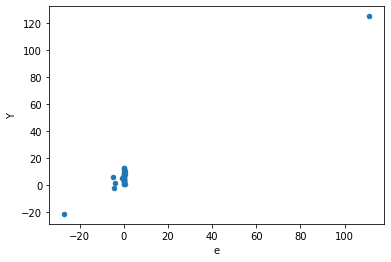

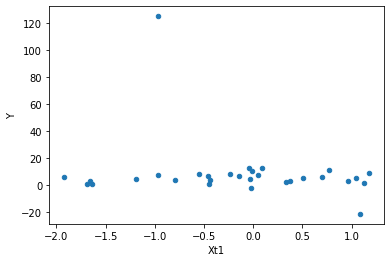

In [43]:
new_table.plot(x ='e', y='Y', kind = 'scatter')
new_table.plot(x ='Xt1', y='Y', kind = 'scatter')

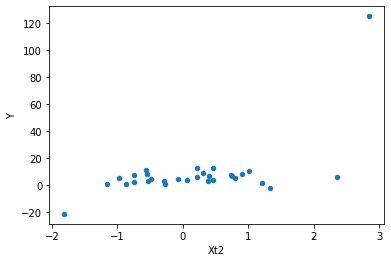

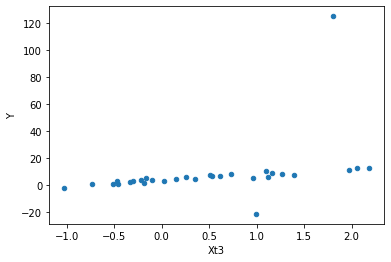

In [44]:
new_table.plot(x ='Xt2', y='Y', kind = 'scatter')
new_table.plot(x ='Xt3', y='Y', kind = 'scatter')